In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [32]:
TSMC_NEWS = pd.read_csv("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的新聞/TSMC_NEWS.csv")
TSMC_PRICE = pd.read_csv("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/做好所有預處理的股價/Foxconn_Stock.csv")


In [33]:
def normalization(df):
    mean = df['positive_score'].mean()
    std = df['positive_score'].std()
    df['positive_score'] = df['positive_score'].apply(lambda x:(x-mean)/std)
    df['negative_score'] = df['negative_score'].apply(lambda x:(x-mean)/std)
    df['emotional_score'] = df['positive_score']- df['negative_score']
    return df

In [34]:
TSMC_NEWS = normalization(TSMC_NEWS)

In [36]:
TSMC_NEWS['emotional_score'].max()
TSMC_NEWS[TSMC_NEWS['emotional_score']==23.81119809929783]


,TITLE,TIME,DESCRIPTION,CONTENT,year,month,day,hour,status,positive_score,negative_score,emotional_score
1619,史上最亂颱風假… 「一竹兩制」民怨衝天被罵翻,2019-09-30,中颱米塔侵襲北台灣，一河之隔的新竹縣市放不放颱風假不同調，連帶科技大廠、學校、法院、郵局遭波...,新竹市長林智堅（左）昨天防颱視察全中興地下道。 記者張雅婷／攝影 分享 facebook...,2019,9,30,0,1,23.889589,0.078391,23.811198


In [3]:
# 匯入必要的工具包
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# 計算分類正確率
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [4]:
TSMC_PRICE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 35 columns):
成交股數_d1               509 non-null float64
成交金額_d1               509 non-null float64
開盤價_d1                509 non-null float64
最高價_d1                509 non-null float64
最低價_d1                509 non-null float64
收盤價_d1                509 non-null float64
漲跌價差_d1               509 non-null object
成交筆數_d1               509 non-null object
成交股數_d2               508 non-null float64
成交金額_d2               508 non-null float64
開盤價_d2                508 non-null float64
最高價_d2                508 non-null float64
最低價_d2                508 non-null float64
收盤價_d2                508 non-null float64
漲跌價差_d2               508 non-null object
成交筆數_d2               508 non-null object
成交股數_d3               507 non-null float64
成交金額_d3               507 non-null float64
開盤價_d3                507 non-null float64
最高價_d3                507 non-null float64
最低價_d3                507 non-null floa

In [5]:
# #把成交筆數從string轉成float
# import ast
# TSMC_PRICE['成交筆數_d1'] = TSMC_PRICE['成交筆數_d1'].apply(lambda x: x.replace(',',''))
# TSMC_PRICE['成交筆數_d1'] = TSMC_PRICE['成交筆數_d1'].apply(lambda x:ast.literal_eval(x))
                                         
# TSMC_PRICE['成交筆數_d2'] = TSMC_PRICE['成交筆數_d2'].apply(lambda x: x.replace(',',''))
# TSMC_PRICE['成交筆數_d2'] = TSMC_PRICE['成交筆數_d2'].apply(lambda x:ast.literal_eval(x))
                                         
# TSMC_PRICE['成交筆數_d3'] = TSMC_PRICE['成交筆數_d3'].apply(lambda x: x.replace(',',''))
# TSMC_PRICE['成交筆數_d3'] = TSMC_PRICE['成交筆數_d3'].apply(lambda x:ast.literal_eval(x))
                                         


In [6]:
X = TSMC_PRICE.drop(columns = ['TIME','status','漲跌價差_d1','漲跌價差_d2','漲跌價差_d3',
                               '成交筆數_d1','成交筆數_d2','成交筆數_d3'])
y = TSMC_PRICE['status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X.columns

Index(['成交股數_d1', '成交金額_d1', '開盤價_d1', '最高價_d1', '最低價_d1', '收盤價_d1', '成交股數_d2',
       '成交金額_d2', '開盤價_d2', '最高價_d2', '最低價_d2', '收盤價_d2', '成交股數_d3', '成交金額_d3',
       '開盤價_d3', '最高價_d3', '最低價_d3', '收盤價_d3', 'emotional_score_d1',
       'emotional_score_d2', 'emotional_score_d3', 'positive_score_d1',
       'positive_score_d2', 'positive_score_d3', 'negative_score_d1',
       'negative_score_d2', 'negative_score_d3'],
      dtype='object')

預測漲跌該日的漲跌

In [8]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [9]:
print(f'{accuracy_score} : {accuracy_score(y_test, model.predict(X_test))}')


<function accuracy_score at 0x1a1df5e3b0> : 0.9215686274509803


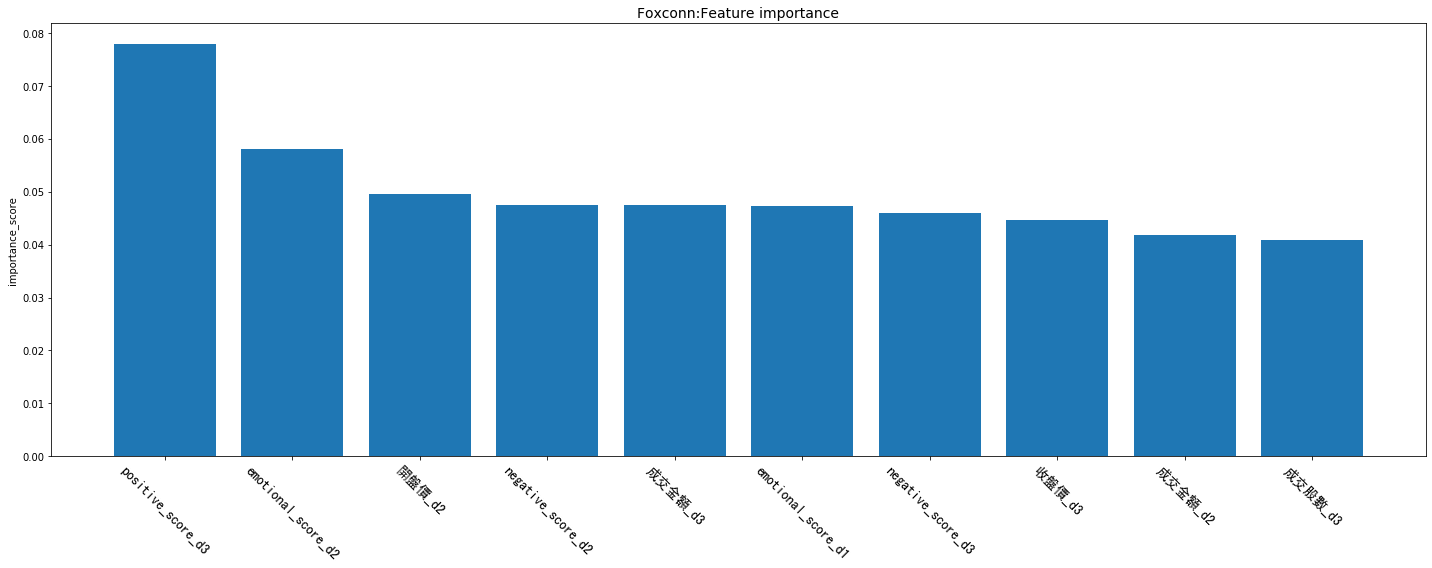

In [10]:
x = model.feature_importances_
y = X_train.columns
feature_importance =  pd.DataFrame(x,y).reset_index()
feature_importance.columns = ['feature_names','feature_importance']
feature_importance = feature_importance.sort_values('feature_importance',ascending=False)
feature_importance.head()

from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(20, 8),tight_layout=True)
plt.xticks(range(10), feature_importance.iloc[:10,0],rotation=-45,fontproperties=font,fontsize=14)
plt.bar(feature_importance.iloc[:10,0],feature_importance.iloc[:10,1])
plt.ylabel('importance_score')
plt.title('Foxconn:Feature importance', fontsize=14)
plt.savefig('鴻海:Feature importance.png')


### 多分類的混淆矩陣

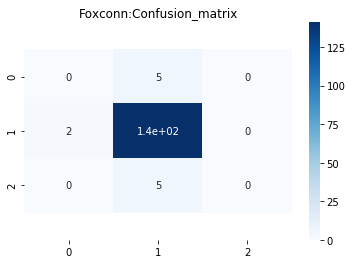

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 

# plt.figure(figsize = (14,8))
y_true = list(y_test)
y_pred = list(model.predict(X_test))
C2= confusion_matrix(y_true, y_pred, labels=[-1, 0, 1]) 

ax = sns.heatmap(C2,annot=True,cmap='Blues')
plt.title('Foxconn:Confusion_matrix')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('鴻海:confusion_matrix',tight_layout=True)




我要將新聞的content結巴斷詞，並且使用我所選出的N個字進行coutvectorizer，得到一個稀疏矩陣  
稀疏矩陣+情感分數+昨日的股價漲跌= X  
status = Y  

### 跑一次確定可以之後，一定要改進的部分
- 股價資訊記得弄回昨天的(沒有人會在開盤就看到當天的結果)
- 股價可以考慮不只一天的
- 可以考慮同業的狀況or新聞納入，豐富語料庫
- 標題和描述可以考慮切一下
- 每個情感分數應該給予不同權重

### 對全部的新聞結巴切詞

In [77]:
token_list = []
for NEWS in TSMC_NEWS['CONTENT']:
    NEWS = re.sub(r'[。，（）_?\d]','',NEWS)
    #這邊想再加一行過濾亂碼的條件，但是還沒搞懂
    seg_list = jieba.cut(NEWS)
    token = ' '.join(NEWS)
    token_list.append(token)


去數每一篇文章出現重要情緒字眼的one-hot-dataframe

In [78]:
with open("/Users/liaoshousan/Desktop/大四上/R語言與資料科學導論/Final_PROJECT-StockPrice Prediction/兩千個重要正負面詞彙/token_2000.txt", "r") as f:
    token_2000 = f.read().splitlines()

token_2000 = list(set(token_2000))
count_vec = CountVectorizer(vocabulary=token_2000)
token_matrix = count_vec.fit_transform(token_list)
token_array = pd.DataFrame(token_matrix.toarray(),columns = token_2000)



In [79]:
X = pd.concat([TSMC_NEWS,token_array],axis = 1)

y = X['status']
X = X.drop(columns=['TITLE','TIME','DESCRIPTION','CONTENT','status','漲跌價差','成交筆數'],axis = 1)



In [80]:
TSMC_NEWS.columns

Index(['TITLE', 'TIME', 'DESCRIPTION', 'CONTENT', 'year', 'month', 'day',
       'hour', 'positive_score', 'negative_score', 'emotional_score', '成交股數',
       '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數', 'status'],
      dtype='object')

In [53]:
col = X.columns
for i in col:
    if X[i].dtypes=='object':
        print(i)
#         X[i] = X[i].astype(float)


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# 匯入必要的工具包
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
# 計算分類正確率
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [56]:
dtrain = xgb.DMatrix(X_train, label = y_train ,feature_names=X_train.columns.values)
dtest = xgb.DMatrix(X_test)

### 參數開調

In [57]:
# parameters = {
#               'max_depth': [5,10],
#                'learning_rate': [0.01,0.03,0.05],
#                'n_estimators': [500,1000],
#                 'min_child_weight': [5,10,15],
#                 'seed':[1500,2000,2500,3000]
# #                'colsample_bytree': [0.5,0.75,1], # 0.5-1是典型值
# #                'scale_pos_weight': [0.9,1]
    
# }

# clf = XGBClassifier(
#     #樹的個數
# #     n_estimators=500,
# #     learning_rate= 0.01, # 如同學習率
# #     max_depth=5, # 構建樹的深度，越大越容易過擬合 
#     subsample=0.7, #隨機取樣訓練樣本 訓練例項的子取樣比
#     gamma=0, # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
#     reg_lambda=1,  # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
#     max_delta_step=0, #最大增量步長，我們允許每個樹的權重估計。
#     colsample_bytree=1, # 生成樹時進行的列取樣
# #     min_child_weight=1, #分裂到多少的節點才停下來，這個引數非常影響結果，該引數值越小，越容易 overfitting
# #     seed=1000,#隨機種子(防止過擬合)
#     reg_alpha=0,# L1 正則項引數
#     scale_pos_weight=1,#如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
#     objective = 'multi:softmax',
#     silent=0 ,# 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#     nthread=4, #cpu 執行緒數 預設最大
# #     eval_metric= 'auc'
# )


# gsearch = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=5)
# gsearch.fit(X_train, y_train)


# print("Best score: %0.3f" % gsearch.best_score_)
# print("Best parameters set:")
# best_parameters = gsearch.best_estimator_.get_params()
# for param_name in sorted(parameters.keys()):
#     print("\t%s: %r" % (param_name, best_parameters[param_name]))



In [58]:
param = {'bst:booster': 'gbtree', 
         'bst:objective': 'multi:softmax',
         'bst:num_class': 3,          
         'bst:max_depth': 5,
         'bst:learning_rate': 0.03,
         'bst:n_estimators': 500, 
         'bst:min_child_weight': 5,
         'bst:subsample': 0.7,
        'bst:colsample_bytree': 0.5,
         'bst:scale_pos_weight': 1,
         'bst:eta':1,'bst:silent':1,
         'bst:reg_alpha':0,'bst:reg_lambda':1,
         'bst:max_delta_step':0, 
         'bst:gamma':0,
         'bst:colsample_bytree':1,
         'bst:scale_pos_weight':1,
        'bst:silent':0 ,
         'bst:nthread':4,
         'bst:seed':2500
}

# param = best_parameters

evallist  = [(dtrain,'train')]
num = 20
bst = xgb.train(param, dtrain,num,evallist,early_stopping_rounds=5)

[0]	train-rmse:0.436163
Will train until train-rmse hasn't improved in 5 rounds.
[1]	train-rmse:0.321281
[2]	train-rmse:0.24248
[3]	train-rmse:0.193624
[4]	train-rmse:0.162764
[5]	train-rmse:0.12696
[6]	train-rmse:0.098257
[7]	train-rmse:0.074602
[8]	train-rmse:0.06531
[9]	train-rmse:0.052638
[10]	train-rmse:0.045342
[11]	train-rmse:0.036716
[12]	train-rmse:0.035369
[13]	train-rmse:0.031485
[14]	train-rmse:0.027035
[15]	train-rmse:0.025529
[16]	train-rmse:0.021629
[17]	train-rmse:0.01954
[18]	train-rmse:0.018777
[19]	train-rmse:0.017898


In [59]:
model = XGBClassifier(objective= 'multi:softmax',
         num_class=3,          
         max_depth= 5,
         learning_rate=0.03,
         n_estimators= 500, 
         min_child_weight= 5,
         subsample=0.7,
         colsample_bytree=0.5,
         scale_pos_weight=1,
         eta=1,
         silent=1,
         reg_alpha=0,
         reg_lambda=1,
         max_delta_step=0, 
         gamma=0,
         sample_bytree=1,
         nthread=4,
         seed=2500)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=500, n_jobs=1,
              nthread=4, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, sample_bytree=1,
              scale_pos_weight=1, seed=2500, silent=1, subsample=0.7,
              verbosity=1)

In [60]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

x = model.feature_importances_
y = bst.feature_names
feature_importance =  pd.DataFrame(x,y).reset_index()
feature_importance.columns = ['feature_names','feature_importance']
feature_importance = feature_importance.sort_values('feature_importance',ascending=False)
feature_importance.head()

,feature_names,feature_importance
7,成交股數,0.189438
9,開盤價,0.129955
8,成交金額,0.113514
1,month,0.108745
10,最高價,0.103225


把機率轉為類別

In [61]:
yprob = bst.predict(dtest)
ypred = np.zeros(len(yprob))

for index,element in enumerate(yprob):
    
    if element < -0.5:
        ypred[index] = -1
    elif -0.5 < element < 0.5:
        ypred[index] = 0
    elif element > 0.5:
        ypred[index] = 1
        

輸出正確率

In [62]:
print(f'{accuracy_score} : {accuracy_score(y_test, ypred)}')


<function accuracy_score at 0x1a258b5290> : 0.9994813278008299


In [66]:
np.where(ypred==-1)

(array([   5,   14,   87,   93,   95,  151,  155,  255,  262,  272,  278,
         307,  324,  341,  388,  448,  455,  473,  493,  499,  502,  524,
         527,  567,  587,  601,  630,  639,  676,  686,  687,  708,  716,
         755,  800,  802,  843,  845,  854,  880,  885,  889,  912,  975,
         979,  991,  994, 1001, 1068, 1090, 1102, 1116, 1157, 1158, 1176,
        1188, 1201, 1208, 1218, 1228, 1265, 1268, 1271, 1321, 1324, 1366,
        1412, 1447, 1473, 1479, 1501, 1504, 1561, 1569, 1603, 1645, 1675,
        1689, 1700, 1706, 1743, 1765, 1768, 1771, 1790, 1799, 1800, 1804,
        1870, 1876, 1878, 1880, 1896, 1908]),)

來看看是哪個特徵影響最大呢？

Text(0.5, 1.0, 'Feature importance')

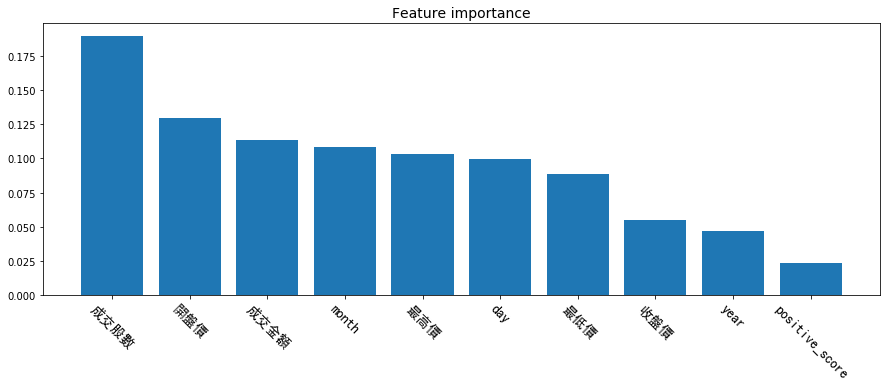

In [72]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf')
fig = plt.figure(figsize=(15, 5))
plt.xticks(range(10), feature_importance.iloc[:10,0],rotation=-45,fontproperties=font,fontsize=14)
plt.bar(feature_importance.iloc[:10,0],feature_importance.iloc[:10,1])
plt.title('Feature importance', fontsize=14)


In [22]:
# from xgboost import plot_importance
# from pylab import mpl
import matplotlib
# 指定默认字体
# matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# matplotlib.rcParams['font.family'] ='sans-serif'
# # 解决负号'-'显示为方块的问题
# matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib.font_manager import _rebuild
from 
# _rebuild() #reload一下


plot_importance(bst,fontproperties = font)


NameError: ignored

In [0]:
# from matplotlib.font_manager import _rebuild
import matplotlib
from glob import glob
import os

dir_cache = matplotlib.get_cachedir()
for file in glob(f'{dir_cache}/*.cache') + glob(f'{dir_cache}/font*'):
    if not os.path.isdir(file): # don't dump the tex.cache folder... because dunno why
        os.remove(file)
        print(f'Deleted font cache {file}.')

In [0]:
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for i in a:
    print(i)

DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
FontAwesome
FontAwesome
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Mono
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Sans Narrow
Liberation Serif
Liberation Serif
Liberation Serif
Liberation Serif
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeThreeSym
STIXSizeTwoSym
STIXSizeTwoSym
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10


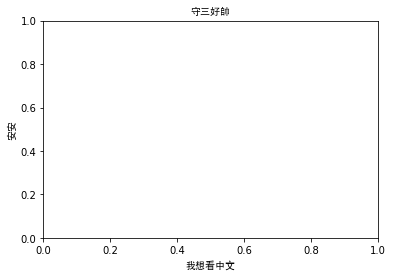

In [0]:
from matplotlib.font_manager import _rebuild
# _rebuild()

import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='/content/gdrive/My Drive/RLSD期末報告/SimHei.ttf')


plt.xlabel('我想看中文',fontproperties = font)
plt.ylabel('安安',fontproperties = font)
plt.title('守三好帥',fontproperties = font)
plt.show()



In [0]:
col = 
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)

SyntaxError: ignored